# Image Processing

## Initial Plotly 2D Gray-Scale Histogram

In [9]:
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

def heatmap(directory, csv_name, x_branch, y_branch, title, x_label, y_label, width, height, size, bins, save_as):

    csv_file = os.path.join(directory, csv_name)
    df = pd.read_csv(csv_file)

    x_data = df[x_branch]
    y_data = df[y_branch]

    fig = go.Figure(go.Histogram2d(
                    x = x_data, 
                    y = y_data,
                    autobinx = False,
                    xbins = dict(start = -size, end = size, size = bins),
                    autobiny = False,
                    ybins = dict(start = -size, end = size, size = bins),
                    colorscale=[[0, 'white'], [1, 'black']],  # Grayscale from black to white
                    colorbar = dict(title = "Density", tickfont = dict(family = 'Merriweather', size = 16, color = 'Black'))))
    
    font_family = 'Merriweather'
    font_small  = 16
    font_medium = 20
    font_large  = 18
    
    fig.update_layout(
                    title = dict(text = title, font = dict(family = font_family, size = font_large, color = "Black"), 
                                 x = 0.51, y = 0.93, yanchor = 'middle', xanchor = 'center'),
                    xaxis_title = dict(text = x_label, font = dict(family = font_family, size = font_medium, color = "Black")),
                    yaxis_title = dict(text = y_label, font = dict(family = font_family, size = font_medium, color = "Black")),
                    xaxis = dict(tickfont = dict(family = font_family, size = font_small, color = "Black"), title_standoff = 25),
                    yaxis = dict(tickfont = dict(family = font_family, size = font_small, color = "Black"), title_standoff = 10),
                    width  = width,
                    height = height,
                    margin = dict(l = 105, r = 90, t = 90, b = 90),
                    )
    
    pio.write_image(fig, save_as, width = width, height = height, scale = 5)
    # fig.show()

# ====================================================================================================================================

directory = 'build/root/'
csv_name = 'huesito_1.csv'

x_branch = "X_axis"
y_branch = 'Y_axis'

title = r"$ \large{ \text{Osteoporosis.}} \ \normalsize{ \text{D to Target} =50cm, \ \text{D to Detector} =15cm, \ \theta = 0°} $"
x_label = r"$ \large{ \text{X Axis} \ (mm)} $"
y_label = r"$ \large{ \text{Y Axis} \ (mm)} $"

width  = 800
height = 800

size = 150
bins = 1

save_as = 'Results/huesito_1.jpg'

heatmap(directory, csv_name, x_branch, y_branch, title, x_label, y_label, width, height, size, bins, save_as)

## Numpy Heatmap Matrix

build/root/prueba_hueso_2.csv


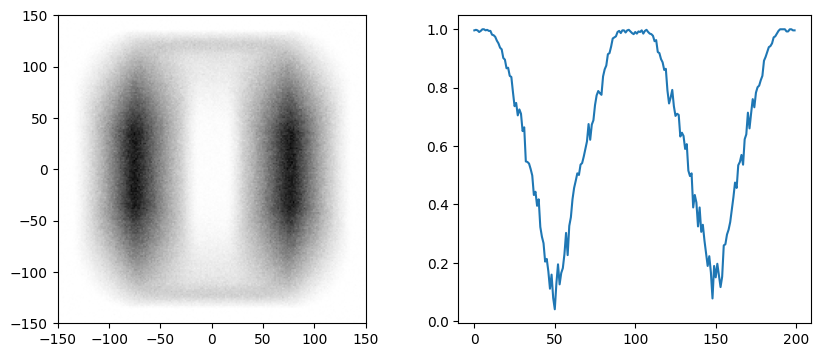

In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def heatmap_array(directory, csv_name, x_branch, y_branch, size, num):
    
    csv_file = os.path.join(directory, csv_name)
    print(csv_file)
    df = pd.read_csv(csv_file)

    x_data = df[x_branch]
    y_data = df[y_branch]

    set_bins = np.arange(-size, size + 1, size/num)

    heatmap, x_edges, y_edges = np.histogram2d(x_data, y_data, bins = [set_bins, set_bins])
    
    normal_map = 1 - heatmap / np.max(heatmap)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(normal_map, cmap='gray', extent = [x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])

    # plt.savefig('Results/heatmap.jpg')

    plt.subplot(1, 2, 2)
    row = 1
    row = len(set_bins) // 2
    plt.plot(normal_map[row][:])

    return normal_map, x_edges, y_edges

# =========================================================================================================================

directory = 'build/root/'
csv_name = 'prueba_hueso_3.csv'

x_branch = "X_axis"
y_branch = 'Y_axis'

size = 150
bins = 100

htmp_array, xlim, ylim = heatmap_array(directory, csv_name, x_branch, y_branch, size, bins)

# optional: save array as csv
# np.savetxt("Results/array2.csv", htmp_array, delimiter=",", fmt="%f")
# print(htmp_array.shape)

## Eliminate Noise by Fourier Transform

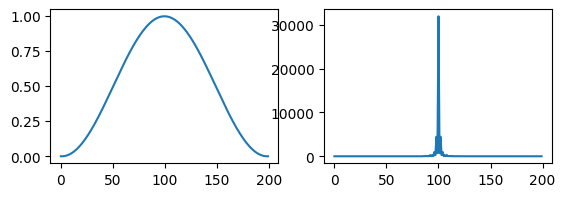

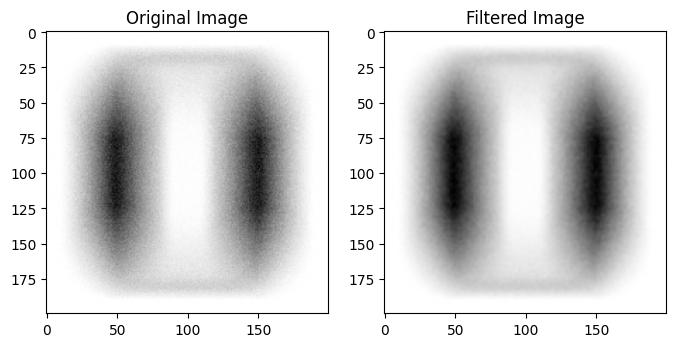

In [5]:
import os
import numpy as np
import pandas as pd
from scipy.fft import fft2, fftshift, ifft2
import matplotlib.pyplot as plt
# from scipy import signal

directory = 'Results/'
csv_name = 'prueba_hueso_2.csv'
csv_path = os.path.join(directory, csv_name)
# image = pd.read_csv(csv_path, header = None)

image = htmp_array

fft_image = fft2(image)
fft_image = fftshift(fft_image)

plt.figure(figsize=(10, 2))

rows, cols = image.shape
# print(rows, cols)

l = rows * 0.99
a = np.hanning(l)
b = np.hanning(l)

padding_size = rows - len(a)
left_padding = padding_size // 2
right_padding = padding_size - left_padding
a = np.pad(a, (left_padding, right_padding), mode='constant')

padding_size = cols - len(b)
left_padding = padding_size // 2
right_padding = padding_size - left_padding
b = np.pad(b, (left_padding, right_padding), mode='constant')

hann_window = np.outer(a, b)

plt.subplot(1, 3, 2)
plt.plot(a)

fft_image_2 = fft_image * (hann_window)

plt.subplot(1, 3, 3)
plt.plot(np.abs((fft_image_2[:][rows//2])))

fft_image = fftshift(fft_image_2)
fft_image = (ifft2(fft_image))
fft_image = (np.abs(fft_image))

plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(fft_image, cmap='gray')
plt.show()

## Save New Heatmap from Numpy Array

In [ ]:
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

def heatmap(array, xlim, ylim, title, x_label, y_label, width, height, save_as):

    fig = go.Figure(go.Heatmap(
                    z = array,
                    x = xlim,
                    y = ylim,
                    colorscale = [[0, 'black'], [1, 'white']],  # Grayscale from black to white
                    colorbar = dict(title = "Density", tickfont = dict(family = 'Merriweather', size = 16, color = 'Black'))))
    
    font_family = 'Merriweather'
    font_small  = 16
    font_medium = 20
    font_large  = 18
    
    fig.update_layout(
                    title = dict(text = title, font = dict(family = font_family, size = font_large, color = "Black"), 
                                 x = 0.51, y = 0.93, yanchor = 'middle', xanchor = 'center'),
                    xaxis_title = dict(text = x_label, font = dict(family = font_family, size = font_medium, color = "Black")),
                    yaxis_title = dict(text = y_label, font = dict(family = font_family, size = font_medium, color = "Black")),
                    xaxis = dict(tickfont = dict(family = font_family, size = font_small, color = "Black"), title_standoff = 25),
                    yaxis = dict(tickfont = dict(family = font_family, size = font_small, color = "Black"), title_standoff = 10),
                    width  = width,
                    height = height,
                    margin = dict(l = 105, r = 90, t = 90, b = 90)
    )
    
    pio.write_image(fig, save_as, width = width, height = height, scale = 5)
    fig.show()

# ====================================================================================================================================

# array = htmp_array
array = fft_image

title = r"$ \large{ \text{Osteoporosis.}} \ \normalsize{ \text{D to Target} =50cm, \ \text{D to Detector} =15cm, \ \theta = 0°} $"
x_label = r"$ \large{ \text{X Axis} \ (mm)} $"
y_label = r"$ \large{ \text{Y Axis} \ (mm)} $"

width  = 800
height = 800

save_as = 'Results/test.jpg'

heatmap(array, xlim, ylim, title, x_label, y_label, width, height, save_as)

In [ ]:
from skimage.morphology import disk, white_tophat, black_tophat, square
import matplotlib.pyplot as plt

processed = white_tophat(htmp_array, footprint = square(10))

processed2 = htmp_array - processed

fig, axs = plt.subplots(1, 3, figsize=(14,14))

axs[0].imshow(htmp_array, cmap='gray')
axs[0].set_title("Original")

axs[1].imshow(processed, cmap='gray')
axs[1].set_title("processed")

axs[2].imshow(processed2, cmap='gray')
axs[2].set_title("processed2")

# plt.tight_layout()

In [ ]:
from skimage.restoration import rolling_ball
import matplotlib.pyplot as plt

processed = rolling_ball(htmp_array, radius = (5))

processed2 = htmp_array - processed

fig, axs = plt.subplots(1, 3, figsize=(14,14))

axs[0].imshow(htmp_array, cmap='gray')
axs[0].set_title("Original")

axs[1].imshow(processed, cmap='gray')
axs[1].set_title("processed")

axs[2].imshow(processed2, cmap='gray')
axs[2].set_title("processed2")

In [ ]:
from skimage.filters import threshold_otsu, threshold_local

thresh = threshold_local(htmp_array, block_size=75)
binary = htmp_array > thresh

processed2 = htmp_array - binary

fig, axs = plt.subplots(1, 3, figsize=(14,14))

axs[0].imshow(htmp_array, cmap='gray')
axs[0].set_title("Original")

axs[1].imshow(binary, cmap='gray')
axs[1].set_title("processed")

axs[2].imshow(processed2, cmap='gray')
axs[2].set_title("processed2")

In [ ]:
from skimage.segmentation import morphological_geodesic_active_contour
from skimage.filters import sobel

# Edge detection
gimage = sobel(htmp_array)

zfish_geodesic = morphological_geodesic_active_contour(gimage, 15, init_level_set='checkerboard')

processed2 = htmp_array - gimage

fig, axs = plt.subplots(1, 3, figsize=(14,14))

axs[0].imshow(htmp_array, cmap='gray')
axs[0].set_title("Original")

axs[1].imshow(zfish_geodesic, cmap='gray')
axs[1].set_title("processed")

axs[2].imshow(processed2, cmap='gray')
axs[2].set_title("processed2")